# Notebook 11: Review astronomy, more pandas manipulation, talk about my tricky function problem
by Rachel Langgin \\
March 2022 and July 2024 \\
Haverford College and University of Nevada, Las Vegas \\

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# This is directly from the web page, but we can also create a pandas dataframe instead of reading it in like so:
df = pd.DataFrame([[1,2], [4,5], [7,8]], index = ['cobra', 'viper', 'sidewinder'], columns = ['max_speed', 'shield'])

In [ ]:
df

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [ ]:
df.loc[['viper', 'sidewinder']]

,max_speed,shield
viper,4,5
sidewinder,7,8


How would you create a new datatable called "mytable" that only contained the columns "My First Column" and "The Last Column" and calls them "first" and "last"
instead? See if you can come up with at least two ways to accomplish this.

In [ ]:
mydf = pd.DataFrame({'My First Column':[4,5,6,7], 'Another Column': [10,20,30,40], 'The Last Column': [100,50,-30,-50]})
mydf

,Another Column,My First Column,The Last Column
0,10,4,100
1,20,5,50
2,30,6,-30
3,40,7,-50


# Woah, it alphabetized the columns.
You do have control of that - .....
This stack overflow page shows you a LOT of options for reordering the columns:
https://stackoverflow.com/questions/11067027/re-ordering-columns-in-pandas-dataframe-based-on-column-name

And this one shows you a lot of different options for creating
the dataframe in the first place. (Wow, that's a lot).  The one
shown just above is most similar to method #2.   https://stackoverflow.com/questions/11067027/re-ordering-columns-in-pandas-dataframe-based-on-column-name


Method #3 is interesting because they name indices... (the things in the left-hand column in the table)

In [ ]:
mydf = pd.DataFrame({'My First Column':[4,5,6,7], 'Another Column':\
                     [10,20,30,40], 'The Last Column': [100,50,-30,-50]}, \
                    index =['rank1', 'rank2', 'rank3', 'rank4'])

In [ ]:
mydf

,Another Column,My First Column,The Last Column
rank1,10,4,100
rank2,20,5,50
rank3,30,6,-30
rank4,40,7,-50


In [ ]:
mydf.columns

### Quiz question:  Create a new datatable called "mytable" that only contains "my first column" and "the last column" and calls them "first" and "last."  (I asked you to find 2 ways)

# First way
In this case, I created a new table that just has those columns, and then I renamed those two columns.

In [ ]:
mytable = mydf[['My First Column', 'The Last Column']]

In [ ]:
mytable

,My First Column,The Last Column
rank1,4,100
rank2,5,50
rank3,6,-30
rank4,7,-50


In [ ]:
# Now rename columns. I like to look at them first.. just kind of to get my footing.
mytable.columns

Index(['My First Column', 'The Last Column'], dtype='object')

In [ ]:
mytable.columns=['first', 'last']


In [ ]:
mytable

,first,last
rank1,4,100
rank2,5,50
rank3,6,-30
rank4,7,-50


# Second way to accomplish this

The basic idea here is that I create lists from each of the columns, and then recreate the dataframe from those two lists.

In [ ]:
col1=mydf['My First Column']

In [ ]:
col1

rank1    4
rank2    5
rank3    6
rank4    7
Name: My First Column, dtype: int64

In [ ]:
col2 = mydf['The Last Column']

```mydf = pd.DataFrame({'My First Column':[4,5,6,7], 'Another Column':\
                     [10,20,30,40], 'The Last Column': [100,50,-30,-50]}, \
                    index =['rank1', 'rank2', 'rank3', 'rank4'])```

In [ ]:
mytable = pd.DataFrame({'first':col1, 'second':col2})

In [ ]:
mytable

,first,second
rank1,4,100
rank2,5,50
rank3,6,-30
rank4,7,-50


## Choosing particular elements of the dataframe using criteria

In [ ]:
# First I create a list of lists
data = [['Tom', 40, 'Steppenwolf'], ['Nica', 15, 'Ariana Grande'], ['Julie', 14, 'none'], \
        ['Charlotte', 27, 'Toad the Wet Sprocket']]

In [ ]:
data

[['Tom', 40, 'Steppenwolf'],
 ['Nica', 15, 'Ariana Grande'],
 ['Julie', 14, 'none'],
 ['Charlotte', 27, 'Toad the Wet Sprocket']]

In [ ]:
# Then I use the method "pd.DataFrame" to turn that into a pandas dataframe
bands = pd.DataFrame(data, columns = ['Name', 'Age', 'favorite band'])

In [ ]:
bands

,Name,Age,favorite band
0,Tom,40,Steppenwolf
1,Nica,15,Ariana Grande
2,Julie,14,none
3,Charlotte,27,Toad the Wet Sprocket


## Here's what I asked: Create an array that only consists of the names of people who are between 20 and 40 and have a favorite band
I asked you first to do this you np.where, so let's tackle that idea.  The first thing we need to do is turn the columns into np.arrays (because the numpy modules like numpy arrays, i.e. they work better with numpy arrays)

In [ ]:
names = np.array(bands.Name)
names

array(['Tom', 'Nica', 'Julie', 'Charlotte'], dtype=object)

In [ ]:
ages = np.array(bands.Age)

In [ ]:
bandarray = np.array(bands['favorite band'])

In [ ]:
bandarray

array(['Steppenwolf', 'Ariana Grande', 'none', 'Toad the Wet Sprocket'],
      dtype=object)

In [ ]:
# Now let's add in the criteria
# You actually have to do this with two separate criteria and an and between them
desind = np.where((ages > 20) & (ages < 40))

In [ ]:
desind  # These are the row numbers where the people are older than
# 20 and younger than 40
# This is super-important for the midterm - that you know that np.where
# returns locations, not the actual values of the array

(array([3]),)

In [ ]:
# To get the names of those people I use "desind" as the
# list of indices for the array "names"
names[desind]

array(['Charlotte'], dtype=object)

In [ ]:
# Finally criteria  = where bands is not equal to none
d2 = np.where(bandarray != 'none')
# Note that you could create more flexible criteria by
# using str.match like I showed you on Monday.

In [ ]:
d2

(array([0, 1, 3]),)

In [ ]:
# And last step is to use that list of indices to create the
# list of names
names[d2]

In [ ]:
desind = np.where((ages > 20) & (ages < 40) & (bandarray != "none"))
# Again, desind is just the locations
mynewarray=names[desind]  # and names[desind] is the actual
# names at those locations

In [ ]:
mynewarray # So this would be the answer to the question

array(['Charlotte'], dtype=object)

## Using df.loc
Next I asked you to do the same thing using df.loc

df.loc can handle criteria!  like not equal to (!=) and less than <
for example.  We actually did this on Tuesdays when we used str.match or
str.contains.

df.loc[(df.a != 1)]

df.loc[(df.b < 5)]

df.loc[(df.a != 1) & (df.b < 5)]

df[df['model'].str.match('Mac')]

Let's see if we can put them all together to do what we want to do:


In [ ]:
The twiddle means "not"

In [ ]:
bands.loc[(bands.Age <40) & (bands.Age > 20)&\
          ~(bands['favorite band'].str.match('none'))]

,Name,Age,favorite band
3,Charlotte,27,Toad the Wet Sprocket


That works, but that took me awhile to figure out, just FYI.  I did this first.

In [ ]:
bands.loc[(bands.Age <40)]

then this

In [ ]:
bands.loc[(bands.Age <40) & (bands.Age >20)]

and then the "who has a favorite band" took me awhile, but here's what I came up with using a hint from:
https://stackoverflow.com/questions/17097643/search-for-does-not-contain-on-a-dataframe-in-pandas
That little twiddle means "not".

In [ ]:
bands.loc[~(bands['favorite band'].str.match('none', na=False))]

(That na=False came last.  We've used that a lot now.  That's a good one to remember.  I just looked it up here https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.match.html  It's what it fills in when there's a missing value.  So in this case, when there's a value missing it will consider the match to be False.  That'll come in handy when you're doing projects, because there will be a lot of missing data.)

And then I could successfully put them all together with &'s.


In [ ]:
bands.loc[(bands.Age <40) & (bands.Age >20) & \
          ~(bands['favorite band'].str.match('none', na=False))]

## What is this loc thing in general?

In [ ]:
bands.loc[[0]] # Try putting other numbers where the "0" is and
# you'll get different rows of the dataframe

,Name,Age,favorite band
0,Tom,40,Steppenwolf


## Astronomy
Explain right ascension and declination to your partner/group as if they had never heard of it before. Partner/group - pretend you've never heard of it before and ask them questions.  Get into some details - like what kind of values would you expect for right ascension and what kind of values would you expect for declination?

# Kind of tricky function problem

Write a function that takes a filename and two strings as input, and reads in the CSV file found at that filename. It takes the two columns named by the two strings, and plots the first column vs the second. The plot has axes that are labeled by the name of the columns.  The function returns the max and min of both columns.  Don't worry about tick marks.

You can test it using data set on this data set of the weights of first-years compared september to april "freshman_lbs.csv" (download/upload it from the same place you usually do).  

In case you hate that data set, there's also a "precipitation.csv" and the owid-covid-data.csv we looked at last time.  Or feel free a csv you found somewhere else.


Hints (this is how I would get the above assignment to work)
* Get the plotting working without a function.  In otherwords, just add some stuff to the cell above until it produces a plot.
* Then put everything in that cell into a function.  The function doesn't even have to have any arguments.  Make sure the function works, i.e. that it makes a plot.
* Then add one argument at a time to the function. For example, first make filename the only argument.  Make sure the function still works.  Then add another keyword, like "col1" (for column 1).
* Rinse, and repeat.
* After you've got all that to work, then have the function return the max of one of the columns.  After you're sure that works, return the max of the other column....

In [ ]:
# Here's a reminder of the syntax for reading in that data set
# Remember, though, you want this to happen inside the function
from google.colab import drive
#drive.mount("/content/drive") # this line only has to be run once
hw = pd.read_csv("/content/drive/MyDrive/UNLV/research!/projects/GW_Explorer_A_Beginners_Guide/Beginning_Python_Notebooks/freshman_lbs.csv", delimiter =',')

In class I did this by renaming the columns because I got scared of
the weird column names, but I'm going to skip that part here, because
it's not necessary for this.

In [ ]:
hw.columns


Index(['Sex', ' Weight (lbs Sep)', ' Weight (lbs Apr)', ' BMI (Sep)',
       ' BMI (Apr)'],
      dtype='object')

When you want to pass a string to plt.plot, you need to use this syntax.

In [ ]:
string1=" Weight (lbs Sep)"  # This didn't work until I noticed there
# was a space before Weight.
string2=" Weight (lbs Apr)"

I did the following to prove to you it doesn't work.  It doesn't
work because the columns are not called "string1" and "string2".

In [ ]:
plt.plot(hw.string1, hw.string2) # doesn't work, because there's no column named "string1" in the df

AttributeError: 'DataFrame' object has no attribute 'string1'

This works though!!  And it's the syntax we want for our function, because it's the only way to make it accept any weird column name
that we happen to pass it.

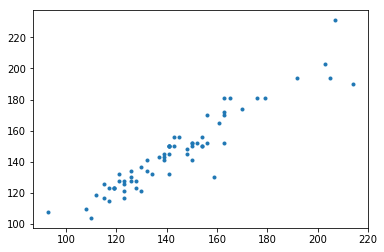

In [ ]:
plt.plot(hw[[string1]], hw[[string2]], '.')

In class I went ON AND ON about how important it was that this
function be agnostic about what filenames and column names you give
it.  In other words, it has to work with any filename and any
column names you give it.

In [ ]:
"""This function takes a filename and two strings (s1, s2) as arguments. It
reads the file in as a csv, and then plots column given by s2 vs
column given by s1"""
def plotcsv(fn, s1, s2):  # fn is filename, s1 and s2 are
    # strings that name the columns we want to plot
    df = pd.read_csv(fn, delimiter =',') # fn is the filename
    # that we are going to open
    plt.plot(df[[s1]], df[[s2]], '.')
    plt.xlabel(s1)
    plt.ylabel(s2)

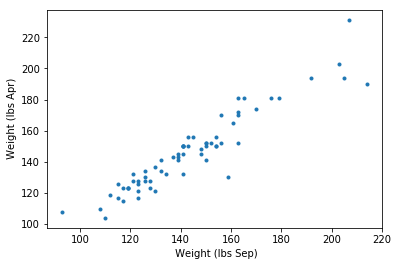

In [ ]:
plotcsv("/content/drive/MyDrive/UNLV/research!/projects/GW_Explorer_A_Beginners_Guide/Beginning_Python_Notebooks/freshman_lbs.csv", " Weight (lbs Sep)", " Weight (lbs Apr)")

Then I sort of humorously tried to show off by showing that this
work on the precipitation.csv as well.  It works marginally well.
Notice the plot labels!!!  I'm proud of that.

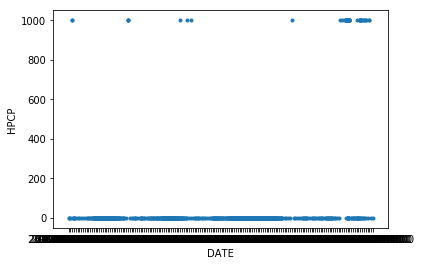

In [ ]:
plotcsv("/content/drive/MyDrive/UNLV/research!/projects/GW_Explorer_A_Beginners_Guide/Beginning_Python_Notebooks/precipitation.csv","DATE", "HPCP")